# Homework Three Deep Learning

## Question 1 : What regularization techniques were mentioned in that Jupyter notebook?

#### Answer : Below mentioned regularization technqiues were mentioned in the jupyter notebook. The code for these is also shown below.

1.   L1 regularization
2.   L2 regularization
3.   Combination of both L1 and L2
4.   Dropout

**L1 and Combination of L1 and L2 Regularization**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

**L2 Regularization**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Dropout Regularization**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Question 2 : Submit your code that creates the above new dataset; then for each of the 5 new labels, randomly select 2 images of that label from your new dataset, and display them in your submitted Jupyter notebook.

#### Answer 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.utils import shuffle

In [ ]:
train_images_new = []
train_labels_new= []
test_images_new = []
test_labels_new = []

# Loading Images from MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# for each pair (A,B) where A is an image of label 0 and B is an image of label 1,
# we create a new image of size 28x28, where each element's value is the "average" of the two corresponding pixel values in A and B.
# (So the new image is a "mixture" of the two original images.)
pairs = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

for label_A, label_B in pairs:
    train_images_A = train_images[train_labels == label_A]
    train_images_B = train_images[train_labels == label_B]
    min_images = min(len(train_images_A), len(train_images_B))

    # Create new images by averaging corresponding pixels
    for i in range(min_images):
        mixed_image = np.mean([train_images_A[i],train_images_B[i]],axis=0)
        train_images_new.append(mixed_image)
        train_labels_new.append(int(label_A/2))  # Divide by 2 to get the new label

train_images_new = np.array(train_images_new)
train_labels_new = np.array(train_labels_new)


In [ ]:
# creating mixture for test pool like the train mixture
pairs = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

for label_A, label_B in pairs:
    test_images_A = test_images[test_labels == label_A]
    test_images_B = test_images[test_labels == label_B]
    min_images = min(len(test_images_A), len(test_images_B))

    for i in range(min_images):
        mixed_image = np.mean([test_images_A[i],test_images_B[i]],axis=0)
        test_images_new.append(mixed_image)
        test_labels_new.append(int(label_A // 2))

test_images_new = np.array(test_images_new)
test_labels_new = np.array(test_labels_new)

print(train_images_new.shape)
print(train_labels_new.shape)

(29071, 28, 28)
(29071,)


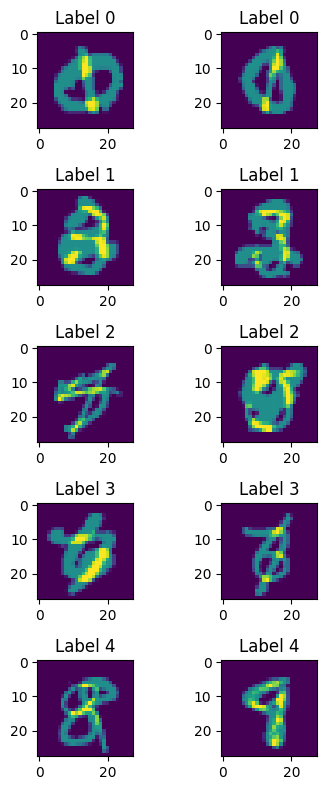

In [ ]:
# Define the mixture labels and find the image indices for each label
mixture_labels = [0, 1, 2, 3, 4]
imagesNumb = [np.where(train_labels_new == label)[0] for label in mixture_labels]

# Display 2 images for each new label from the training dataset
figTrain, axisTrain = plt.subplots(len(mixture_labels), 2, figsize=(4, 8))
for i, label in enumerate(mixture_labels):
    j = np.random.choice(imagesNumb[i], size=2, replace=False)
    axisTrain[i, 0].imshow(train_images_new[j[0]])
    axisTrain[i, 0].set_title(f"Label {label}")
    axisTrain[i, 1].imshow(train_images_new[j[1]])
    axisTrain[i, 1].set_title(f"Label {label}")

plt.tight_layout()
plt.show()


## Question 3 : Design a neural network model to classify the 5 classes in the new dataset, and optimize it by tuning its hyper-parameters and trying our learned regualization techniques (such as L1 regularization, L2 regularization, dropout).

#### Answer 3 Below is the code where I have tried different neural models with different regularization techniques and droput. The details are captured in each model and summary is written at the end.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow import keras

train_images_new =train_images_new.reshape((29071, 28 * 28))
train_images_new =train_images_new.astype("float32") / 255

test_images_new =test_images_new.reshape((4814, 28 * 28))
test_images_new =test_images_new.astype("float32") / 255

train_img,val_img, train_label, val_label = train_test_split(train_images_new,train_labels_new, test_size=0.2, shuffle=True)

**Model 1 with no regularization**

In [ ]:
model1 = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(8,activation='softmax')
])

model1.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model1_res = model1.fit(
    train_img,train_label,
    epochs=20,
    batch_size=128,
    validation_data=(val_img,val_label))

Epoch 1/20
182/182 [==============================] - 4s 6ms/step - loss: 0.4289 - accuracy: 0.8720 - val_loss: 0.1390 - val_accuracy: 0.9584
Epoch 2/20
182/182 [==============================] - 1s 5ms/step - loss: 0.1320 - accuracy: 0.9573 - val_loss: 0.1358 - val_accuracy: 0.9582
Epoch 3/20
182/182 [==============================] - 1s 5ms/step - loss: 0.1093 - accuracy: 0.9649 - val_loss: 0.1318 - val_accuracy: 0.9570
Epoch 4/20
182/182 [==============================] - 1s 5ms/step - loss: 0.0938 - accuracy: 0.9691 - val_loss: 0.0993 - val_accuracy: 0.9661
Epoch 5/20
182/182 [==============================] - 1s 5ms/step - loss: 0.0803 - accuracy: 0.9736 - val_loss: 0.1064 - val_accuracy: 0.9680
Epoch 6/20
182/182 [==============================] - 1s 5ms/step - loss: 0.0706 - accuracy: 0.9769 - val_loss: 0.0841 - val_accuracy: 0.9730
Epoch 7/20
182/182 [==============================] - 1s 5ms/step - loss: 0.0607 - accuracy: 0.9794 - val_loss: 0.0751 - val_accuracy: 0.9766
Epoch 

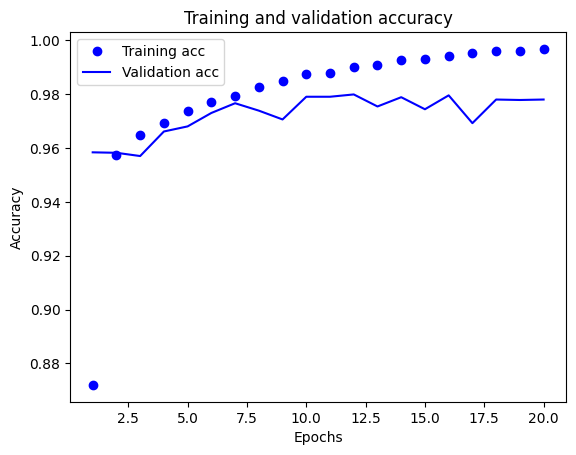

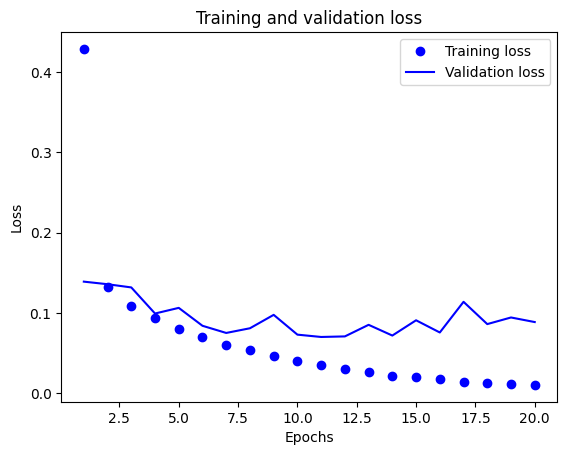

In [ ]:
model1_d= model1_res.history

accuracy1 = model1_d["accuracy"]
val_acc1 = model1_d["val_accuracy"]

epochs = range(1, len(accuracy1) + 1)

plt.plot(epochs, accuracy1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


loss_values1 = model1_d["loss"]
val_loss_values1 = model1_d["val_loss"]

epochs = range(1, len(loss_values1) + 1)

plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Overfitting is seen here**

In [ ]:
results1 = model1.evaluate(test_images_new,test_labels_new)
results1

151/151 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9776


[0.0749572366476059, 0.9775654077529907]

**Model 2 with 1 Dropout Layer**

In [ ]:
model2 = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(8,activation='softmax')
])

model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model2_res = model2.fit(
    train_img,train_label,
    epochs=20,
    batch_size=128,
    validation_data=(val_img,val_label))

Epoch 1/20
182/182 [==============================] - 2s 6ms/step - loss: 0.4709 - accuracy: 0.8471 - val_loss: 0.1503 - val_accuracy: 0.9537
Epoch 2/20
182/182 [==============================] - 1s 5ms/step - loss: 0.1664 - accuracy: 0.9461 - val_loss: 0.1144 - val_accuracy: 0.9637
Epoch 3/20
182/182 [==============================] - 1s 7ms/step - loss: 0.1341 - accuracy: 0.9567 - val_loss: 0.1109 - val_accuracy: 0.9641
Epoch 4/20
182/182 [==============================] - 1s 7ms/step - loss: 0.1167 - accuracy: 0.9625 - val_loss: 0.1211 - val_accuracy: 0.9610
Epoch 5/20
182/182 [==============================] - 1s 6ms/step - loss: 0.1062 - accuracy: 0.9653 - val_loss: 0.1043 - val_accuracy: 0.9673
Epoch 6/20
182/182 [==============================] - 1s 5ms/step - loss: 0.0986 - accuracy: 0.9679 - val_loss: 0.1008 - val_accuracy: 0.9702
Epoch 7/20
182/182 [==============================] - 1s 5ms/step - loss: 0.0900 - accuracy: 0.9704 - val_loss: 0.0894 - val_accuracy: 0.9723
Epoch 

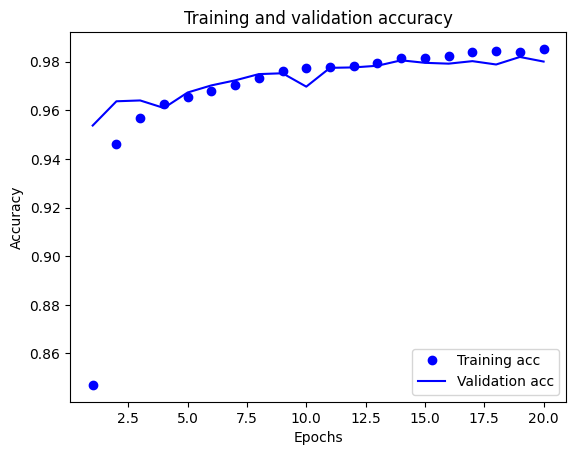

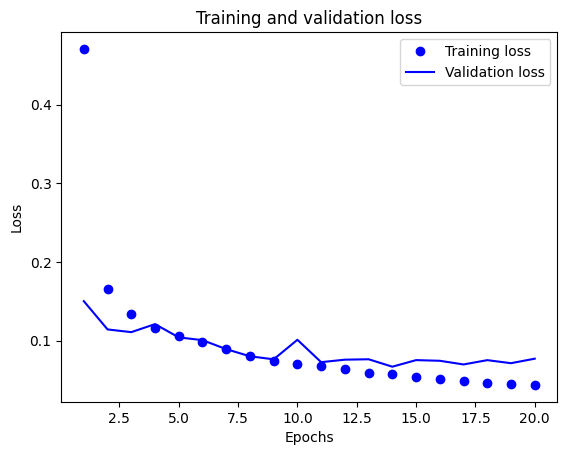

In [ ]:
model2_d= model2_res.history

accuracy2 = model2_d["accuracy"]
val_acc2 = model2_d["val_accuracy"]

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, "bo", label="Training acc")
plt.plot(epochs, val_acc2, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


loss_values2 = model2_d["loss"]
val_loss_values2 = model2_d["val_loss"]

epochs = range(1, len(loss_values2) + 1)

plt.plot(epochs, loss_values2, "bo", label="Training loss")
plt.plot(epochs, val_loss_values2, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
results2 = model2.evaluate(test_images_new,test_labels_new)
results2

151/151 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9765


[0.08188272267580032, 0.9765267968177795]

**Model 3 with 2 Dropout Layers**

In [ ]:
model3 = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8,activation='softmax')
])

model3.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model3_res = model3.fit(
    train_img,train_label,
    epochs=20,
    batch_size=128,
    validation_data=(val_img,val_label))

Epoch 1/20
182/182 [==============================] - 4s 10ms/step - loss: 0.7912 - accuracy: 0.7209 - val_loss: 0.1619 - val_accuracy: 0.9524
Epoch 2/20
182/182 [==============================] - 1s 6ms/step - loss: 0.2592 - accuracy: 0.9239 - val_loss: 0.1266 - val_accuracy: 0.9603
Epoch 3/20
182/182 [==============================] - 1s 5ms/step - loss: 0.1914 - accuracy: 0.9456 - val_loss: 0.1176 - val_accuracy: 0.9642
Epoch 4/20
182/182 [==============================] - 1s 6ms/step - loss: 0.1717 - accuracy: 0.9522 - val_loss: 0.1121 - val_accuracy: 0.9672
Epoch 5/20
182/182 [==============================] - 1s 6ms/step - loss: 0.1587 - accuracy: 0.9569 - val_loss: 0.1384 - val_accuracy: 0.9604
Epoch 6/20
182/182 [==============================] - 1s 6ms/step - loss: 0.1388 - accuracy: 0.9626 - val_loss: 0.1042 - val_accuracy: 0.9694
Epoch 7/20
182/182 [==============================] - 1s 6ms/step - loss: 0.1360 - accuracy: 0.9634 - val_loss: 0.0894 - val_accuracy: 0.9737
Epoch

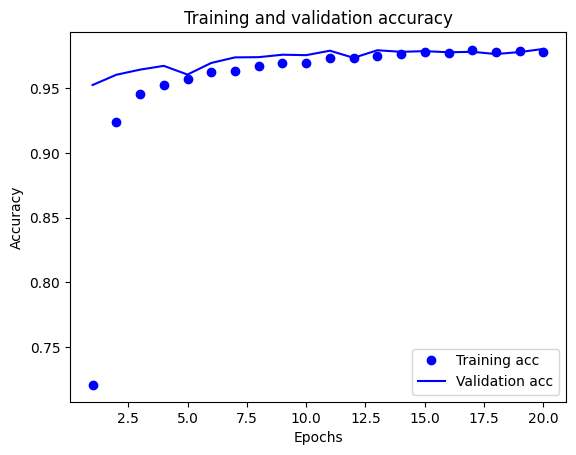

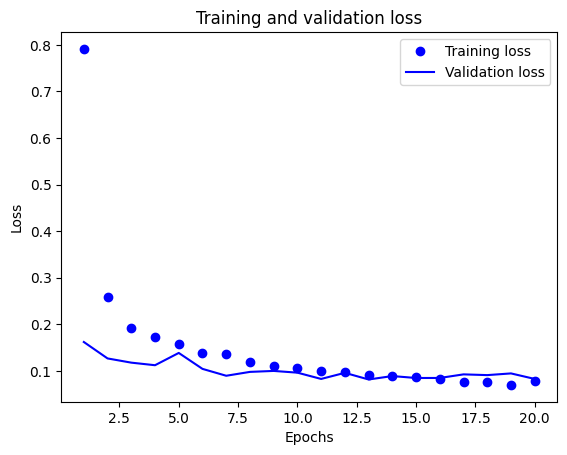

In [ ]:
model3_d= model3_res.history

accuracy3 = model3_d["accuracy"]
val_acc3 = model3_d["val_accuracy"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


loss_values3 = model3_d["loss"]
val_loss_values3 = model3_d["val_loss"]

epochs = range(1, len(loss_values3) + 1)

plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
results3 = model3.evaluate(test_images_new,test_labels_new)
results3

151/151 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9776


[0.08554691821336746, 0.9775654077529907]

**Model 4 with L2 regularization**

In [ ]:
model4 = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.002),activation='relu'),
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.002),activation='relu'),
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.002),activation='relu'),
    layers.Dense(8,activation='softmax')
])

model4.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model4_res = model4.fit(
    train_img,train_label,
    epochs=20,
    batch_size=128,
    validation_data=(val_img,val_label))

Epoch 1/20
182/182 [==============================] - 2s 6ms/step - loss: 0.6532 - accuracy: 0.8926 - val_loss: 0.3826 - val_accuracy: 0.9403
Epoch 2/20
182/182 [==============================] - 1s 5ms/step - loss: 0.3416 - accuracy: 0.9512 - val_loss: 0.3507 - val_accuracy: 0.9420
Epoch 3/20
182/182 [==============================] - 1s 5ms/step - loss: 0.3008 - accuracy: 0.9558 - val_loss: 0.2990 - val_accuracy: 0.9534
Epoch 4/20
182/182 [==============================] - 1s 5ms/step - loss: 0.2761 - accuracy: 0.9564 - val_loss: 0.2956 - val_accuracy: 0.9482
Epoch 5/20
182/182 [==============================] - 1s 5ms/step - loss: 0.2547 - accuracy: 0.9604 - val_loss: 0.2375 - val_accuracy: 0.9665
Epoch 6/20
182/182 [==============================] - 1s 5ms/step - loss: 0.2410 - accuracy: 0.9609 - val_loss: 0.2376 - val_accuracy: 0.9589
Epoch 7/20
182/182 [==============================] - 1s 6ms/step - loss: 0.2285 - accuracy: 0.9629 - val_loss: 0.2249 - val_accuracy: 0.9620
Epoch 

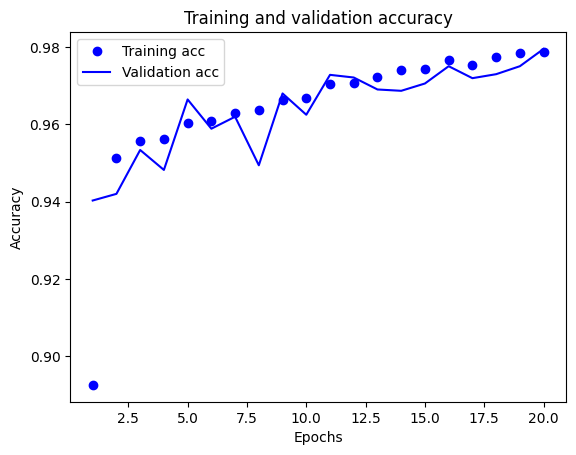

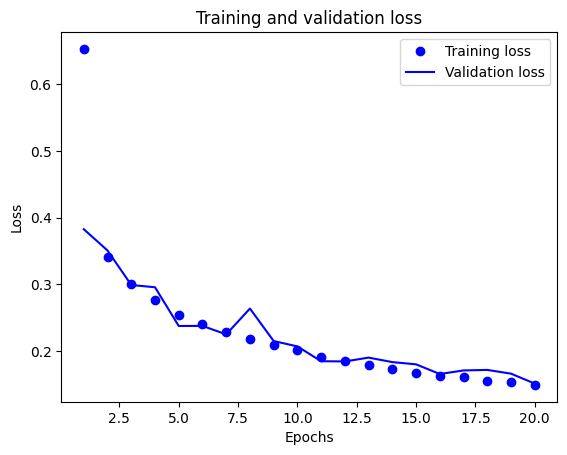

In [ ]:
model4_d= model4_res.history

accuracy4 = model4_d["accuracy"]
val_acc4 = model4_d["val_accuracy"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "bo", label="Training acc")
plt.plot(epochs, val_acc4, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


loss_values4 = model4_d["loss"]
val_loss_values4 = model4_d["val_loss"]

epochs = range(1, len(loss_values4) + 1)

plt.plot(epochs, loss_values4, "bo", label="Training loss")
plt.plot(epochs, val_loss_values4, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
results4 = model4.evaluate(test_images_new,test_labels_new)
results4

151/151 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9788


[0.15082518756389618, 0.9788118004798889]

**Model 5 with L1 regularization**

In [ ]:
model5 = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l1(0.002),activation='relu'),
    layers.Dense(32,kernel_regularizer=regularizers.l1(0.002),activation='relu'),
    layers.Dense(32,kernel_regularizer=regularizers.l1(0.002),activation='relu'),
    layers.Dense(8,activation='softmax')
])

model5.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model5_res = model5.fit(
    train_img,train_label,
    epochs=20,
    batch_size=128,
    validation_data=(val_img,val_label))

Epoch 1/20
182/182 [==============================] - 2s 8ms/step - loss: 2.3010 - accuracy: 0.8224 - val_loss: 1.1519 - val_accuracy: 0.9288
Epoch 2/20
182/182 [==============================] - 1s 8ms/step - loss: 0.9853 - accuracy: 0.9263 - val_loss: 0.8850 - val_accuracy: 0.9188
Epoch 3/20
182/182 [==============================] - 1s 6ms/step - loss: 0.8141 - accuracy: 0.9325 - val_loss: 0.8398 - val_accuracy: 0.9044
Epoch 4/20
182/182 [==============================] - 1s 5ms/step - loss: 0.7300 - accuracy: 0.9364 - val_loss: 0.6886 - val_accuracy: 0.9408
Epoch 5/20
182/182 [==============================] - 1s 5ms/step - loss: 0.6695 - accuracy: 0.9400 - val_loss: 0.6226 - val_accuracy: 0.9510
Epoch 6/20
182/182 [==============================] - 1s 5ms/step - loss: 0.6259 - accuracy: 0.9427 - val_loss: 0.5869 - val_accuracy: 0.9525
Epoch 7/20
182/182 [==============================] - 1s 5ms/step - loss: 0.5890 - accuracy: 0.9443 - val_loss: 0.5721 - val_accuracy: 0.9460
Epoch 

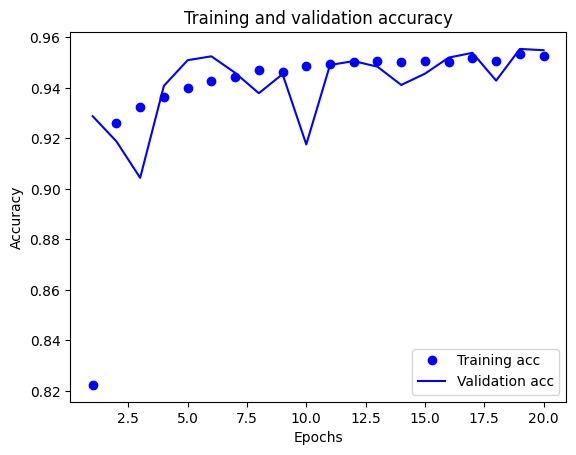

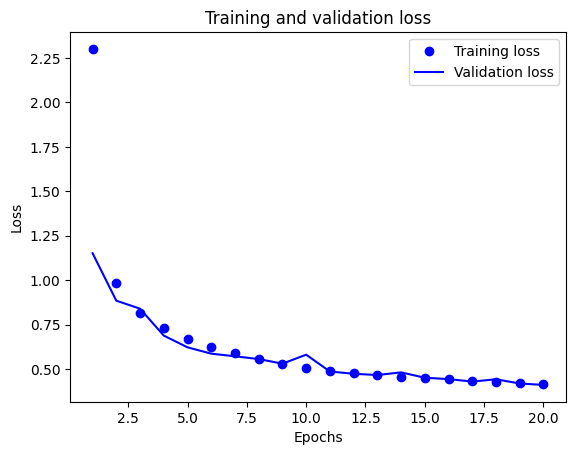

In [ ]:
model5_d= model5_res.history

accuracy5 = model5_d["accuracy"]
val_acc5 = model5_d["val_accuracy"]

epochs = range(1, len(accuracy5) + 1)

plt.plot(epochs, accuracy5, "bo", label="Training acc")
plt.plot(epochs, val_acc5, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


loss_values5 = model5_d["loss"]
val_loss_values5 = model5_d["val_loss"]

epochs = range(1, len(loss_values5) + 1)

plt.plot(epochs, loss_values5, "bo", label="Training loss")
plt.plot(epochs, val_loss_values5, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
results5 = model5.evaluate(test_images_new,test_labels_new)
results5

151/151 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.9572


[0.40527644753456116, 0.9572081565856934]

**Model 6 with L1_L2 regularization**

In [ ]:
model6 = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu'),
    layers.Dense(32,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu'),
    layers.Dense(32,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu'),
    layers.Dense(8,activation='softmax')
])

model6.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model6_res = model6.fit(
    train_img,train_label,
    epochs=20,
    batch_size=128,
    validation_data=(val_img,val_label))

Epoch 1/20
182/182 [==============================] - 2s 8ms/step - loss: 1.5453 - accuracy: 0.8844 - val_loss: 0.8995 - val_accuracy: 0.9381
Epoch 2/20
182/182 [==============================] - 1s 6ms/step - loss: 0.7927 - accuracy: 0.9350 - val_loss: 0.7123 - val_accuracy: 0.9391
Epoch 3/20
182/182 [==============================] - 2s 9ms/step - loss: 0.6644 - accuracy: 0.9410 - val_loss: 0.6148 - val_accuracy: 0.9475
Epoch 4/20
182/182 [==============================] - 1s 8ms/step - loss: 0.5969 - accuracy: 0.9442 - val_loss: 0.5621 - val_accuracy: 0.9494
Epoch 5/20
182/182 [==============================] - 1s 6ms/step - loss: 0.5525 - accuracy: 0.9443 - val_loss: 0.5326 - val_accuracy: 0.9469
Epoch 6/20
182/182 [==============================] - 1s 5ms/step - loss: 0.5163 - accuracy: 0.9463 - val_loss: 0.5292 - val_accuracy: 0.9367
Epoch 7/20
182/182 [==============================] - 1s 6ms/step - loss: 0.4861 - accuracy: 0.9476 - val_loss: 0.4559 - val_accuracy: 0.9575
Epoch 

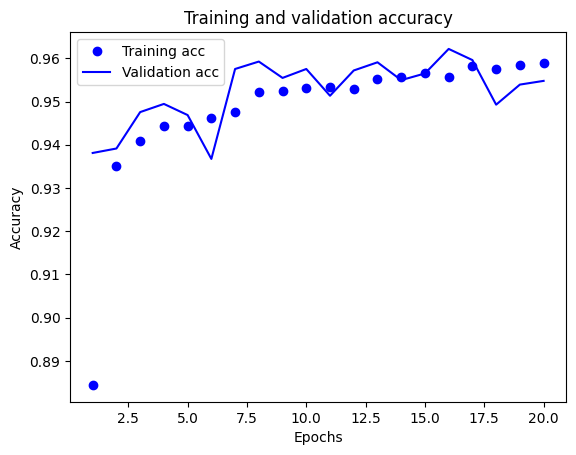

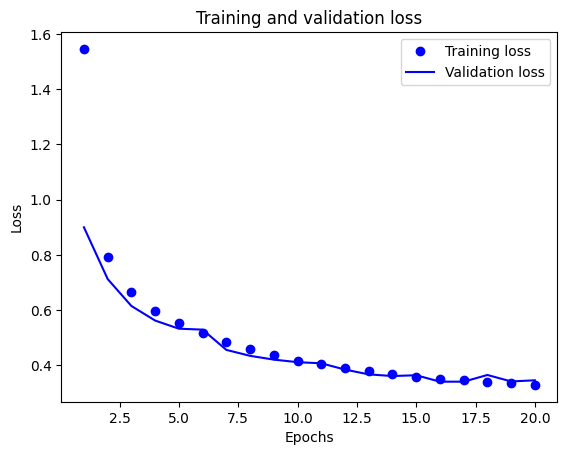

In [ ]:
model6_d= model6_res.history

accuracy6 = model6_d["accuracy"]
val_acc6 = model6_d["val_accuracy"]

epochs = range(1, len(accuracy6) + 1)

plt.plot(epochs, accuracy6, "bo", label="Training acc")
plt.plot(epochs, val_acc6, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


loss_values6 = model6_d["loss"]
val_loss_values6 = model6_d["val_loss"]

epochs = range(1, len(loss_values6) + 1)

plt.plot(epochs, loss_values6, "bo", label="Training loss")
plt.plot(epochs, val_loss_values6, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
results6 = model6.evaluate(test_images_new,test_labels_new)
results6

151/151 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.9562


[0.33914434909820557, 0.9561694860458374]

In [ ]:
print("Model1 Accuracy without any regularization techniques: %.2f%%" % (results1[1]*100))
print("Model2 Accuracy with 1 Dropout layer: %.2f%%" % (results2[1]*100))
print("Model3 Accuracy with 2 Dropout layers: %.2f%%" % (results3[1]*100))
print("Model4 Accuracy with L2 regularization: %.2f%%" % (results4[1]*100))
print("Model5 Accuracy with L1 regularization: %.2f%%" % (results5[1]*100))
print("Model6 Accuracy with L1_L2 regularization: %.2f%%" % (results6[1]*100))

Model1 Accuracy without any regularization techniques: 97.76%
Model2 Accuracy with 1 Dropout layer: 97.65%
Model3 Accuracy with 2 Dropout layers: 97.76%
Model4 Accuracy with L2 regularization: 97.88%
Model5 Accuracy with L1 regularization: 95.72%
Model6 Accuracy with L1_L2 regularization: 95.62%


**SUMMARY**

So lets conclude and discuss the above results. Firstly I had the base model with the below configuration :


```
model1 = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(8,activation='softmax')
])
```

After this, I tried various droput and regularization techniques mentioned below and their analysis is given below.
As we can see from the above accuracies that Model 4 performed best.


Analysis:

All models achieved relatively high accuracy, with the best performance in Model4 with L2 regularization.
There is no significant difference in accuracy between models with and without dropout layers (Models1, 2, and 3).
L2 regularization (Model4) outperformed other regularization techniques (L1 and L1_L2).

*   Model 1 without any regularization techniques perfomed well but there is overfitting seen after 6th epoch.
*   Model 2 with 1 Dropout layer gave almost similar accuracy. But from the graph it is clear that there is not much overfitting or underfitting seen hinting that these models are quite stable.
*   Model 3 with 2 Dropout layers again gave same result as that of Model1 for test set. Similarly, this model also doesnt overfit or underfit much as seen from the graph.
*   Model 4 with L2 regularization gave us the best results for accuracy. Test accuracy is the best and even we dont see too much of overfitting although there is some present.
*   Model 5 and Model 6 with L1 and combination of L1_L2 regularization lead to less accuracy of all these models. As seenro m the graph there is overfitting or underfitting present in these models.

Overfitting/Underfitting: It's important to examine the training and validation performance over epochs to detect overfitting. Visualizing these curves was helpful and analysis of these is given in the above points.

Regularization: Regularization techniques (L1, L2, and L1_L2) did result in higher accuracy compared to the model without regularization (Model1) except for L1 and L1_L2.
Dropout layers (Models2 and 3) did not lead to significant improvements either.




In summary, ***Model4 with L2 regularization performed the best in terms of accuracy for test set.***



```
model4 = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.002),activation='relu'),
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.002),activation='relu'),
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.002),activation='relu'),
    layers.Dense(8,activation='softmax')
])
```


Accuracy for Model4 with L2 Regularization Layer: 97.88%

